[nltk_data] Downloading package movie_reviews to C:\Users\HELLO
[nltk_data]     LARKANA\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


Accuracy: 0.7775

 Classification Report:
               precision    recall  f1-score   support

         neg       0.75      0.81      0.78       194
         pos       0.81      0.75      0.78       206

    accuracy                           0.78       400
   macro avg       0.78      0.78      0.78       400
weighted avg       0.78      0.78      0.78       400


 Sample Predictions:

Review 1:
capsule : where are you tonight , leni rienfenstal ? 
starship troopers is an expensive , hateful and unenjoyable piece of violent pornography -- and  ...
Predicted Sentiment: neg

Review 2:
it's amazing how a comedian can have the some of the funniest stand-up around but completely fall flat in the movies . 
take adam sandler . 
on the ba ...
Predicted Sentiment: neg

Review 3:
when i ponder childhood memories past , one of the things that always springs immediately to mind is watching the " inspector gadget " tv show with my ...
Predicted Sentiment: neg


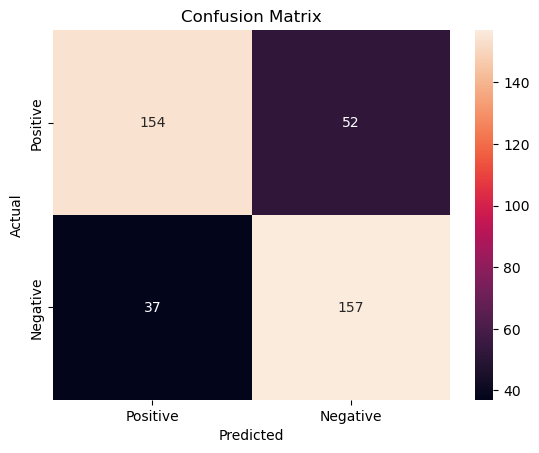

In [12]:
# Import libraries
import nltk
import random
import numpy as np
from nltk.corpus import movie_reviews
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

# now we need to download movie reviews dataset
nltk.download('movie_reviews')

# load data and labels from movie_reviews
documents = []
for category in movie_reviews.categories():
    for fileid in movie_reviews.fileids(category):
        documents.append((movie_reviews.raw(fileid), category))

# need to Shuffle the data randomly
random.shuffle(documents)

# now Separate texts and labels
texts = [text for text, label in documents]
labels = [label for text, label in documents]

# Split into train and test sets (e.g 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

# now Converting text into numerical features using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

# Train a Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train_vect, y_train)

# Predict on test set
y_pred = model.predict(X_test_vect)

# Show accuracy and detailed report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))

#Predict some sample reviews
print("\n Sample Predictions:")
for i in range(3):
    print(f"\nReview {i+1}:")
    print(X_test[i][:150], "...")
    print("Predicted Sentiment:", model.predict(vectorizer.transform([X_test[i]]))[0])

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=["pos", "neg"])
sns.heatmap(cm, annot=True, fmt='d', xticklabels=["Positive", "Negative"], yticklabels=["Positive", "Negative"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

#Save model and vectorizer
with open("sentiment_model.pkl", "wb") as file:
    pickle.dump(model, file)

with open("vectorizer.pkl", "wb") as file:
    pickle.dump(vectorizer, file)
